In [1]:
#all plotly
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf
init_notebook_mode(connected=True)

#all seaborn
import seaborn as sns
import scipy
from matplotlib import pyplot as plt

#others
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('YFT_iotc_2.csv')
df = pd.DataFrame(data)
print(df)

        Year  Month     Grid Fishery  NCnoFish  NCmtFish
0       1950      1  6100070      BB   9502.98     31.25
1       1950      1  6100080      BB    966.68      3.24
2       1950      1  6100080      GI    191.97      1.82
3       1950      1  6100080      OT    103.37      0.70
4       1950      1  6100080      TR     38.93      1.52
...      ...    ...      ...     ...       ...       ...
264092  2020     12  6230095      LF     25.78      1.41
264093  2020     12  6230100      LF    167.57      9.36
264094  2020     12  6235020      LL     50.83      3.17
264095  2020     12  6235025      LL      1.13      0.06
264096  2020     12  6235030      LL      2.20      0.11

[264097 rows x 6 columns]


In [3]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
print(df)

        Year  Month     Grid Fishery  NCnoFish  NCmtFish       Date
0       1950      1  6100070      BB   9502.98     31.25 1950-01-01
1       1950      1  6100080      BB    966.68      3.24 1950-01-01
2       1950      1  6100080      GI    191.97      1.82 1950-01-01
3       1950      1  6100080      OT    103.37      0.70 1950-01-01
4       1950      1  6100080      TR     38.93      1.52 1950-01-01
...      ...    ...      ...     ...       ...       ...        ...
264092  2020     12  6230095      LF     25.78      1.41 2020-12-01
264093  2020     12  6230100      LF    167.57      9.36 2020-12-01
264094  2020     12  6235020      LL     50.83      3.17 2020-12-01
264095  2020     12  6235025      LL      1.13      0.06 2020-12-01
264096  2020     12  6235030      LL      2.20      0.11 2020-12-01

[264097 rows x 7 columns]


In [5]:
#tidy data
df = df.rename(columns = {'NCnoFish': 'Count', 'NCmtFish': 'Weight'})
df_tidy = df.drop(['Grid', 'Year', 'Month'], axis=1)
df_tidy.head()

,Fishery,Count,Weight,Date
0,BB,9502.98,31.25,1950-01-01
1,BB,966.68,3.24,1950-01-01
2,GI,191.97,1.82,1950-01-01
3,OT,103.37,0.70,1950-01-01
4,TR,38.93,1.52,1950-01-01


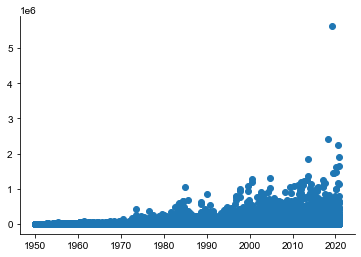

In [6]:
plt.scatter(df_tidy.Date, df_tidy.Count)
sns.set_style("ticks")
sns.despine()
plt.show()

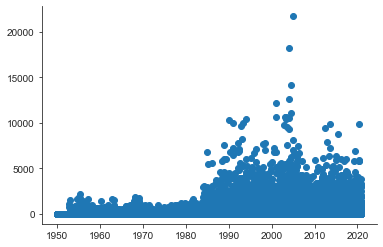

In [7]:
plt.scatter(df_tidy.Date, df_tidy.Weight)
sns.set_style("ticks")
sns.despine()
plt.show()

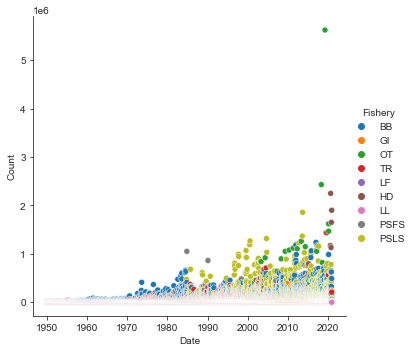

In [8]:
sns.relplot(data=df_tidy, x="Date", y="Count", hue="Fishery")

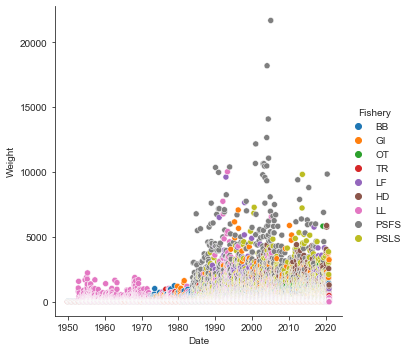

In [9]:
sns.relplot(data=df_tidy, x="Date", y="Weight", hue="Fishery")

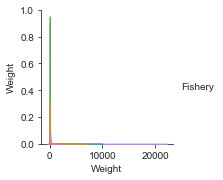

In [12]:
df_tidy_weight = df_tidy.drop(['Count'], axis=1)
sns.set_style("ticks")
sns.pairplot(df_tidy_weight, hue = 'Fishery', diag_kind = "kde", kind = "scatter", palette = "husl")
plt.show()

In [60]:
df_by_year = df_tidy.groupby('Year').sum()
df_by_year.reset_index()

,Year,Month,Count,Weight_in_Mt
0,1950,9672,809339.85,4316.88
1,1951,9672,933026.22,4761.12
2,1952,9741,983394.55,8419.99
3,1953,10079,1027254.59,11545.24
4,1954,15187,1414062.54,26996.17
...,...,...,...,...
66,2016,31477,43958891.60,427620.21
67,2017,30614,52953269.95,421816.63
68,2018,28698,46213876.96,442138.34
69,2019,29249,62003604.04,448641.05
